### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Read the Data

In [2]:
data = pd.read_csv('scores.csv')

In [3]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Data Visualization

Text(0.5, 1.0, 'Scores on the basis of hours studied')

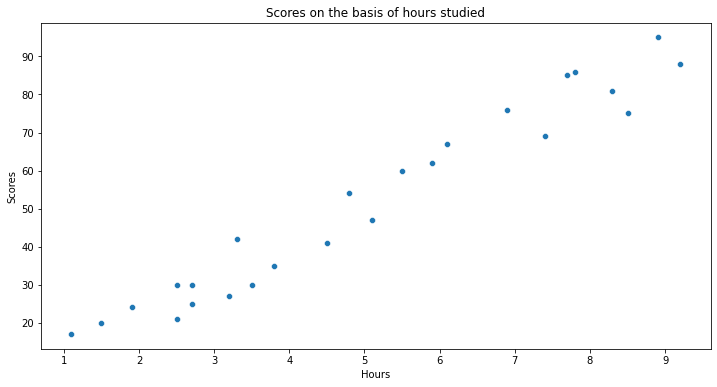

In [4]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=data.Hours,y=data.Scores)
plt.title("Scores on the basis of hours studied")

Text(0.5, 1.0, 'Scores on the basis of hours studied')

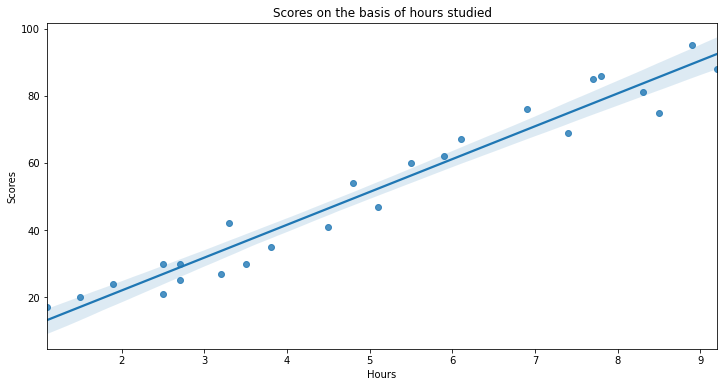

In [5]:
plt.figure(figsize=(12,6))
sns.regplot(x=data.Hours,y=data.Scores)
plt.title("Scores on the basis of hours studied")

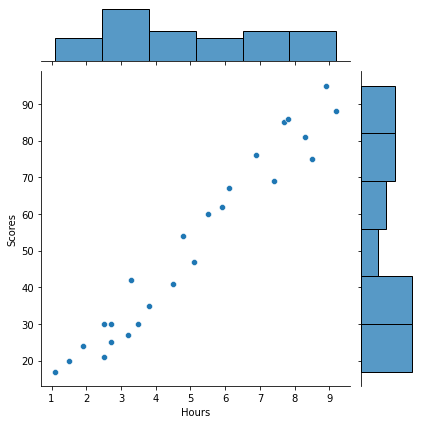

In [6]:
sns.jointplot(x='Hours',y='Scores',data=data)

In [7]:
X = data.iloc[:,:-1].values
y = data.iloc[:,1].values

In [8]:
X.reshape(-1,1)

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [9]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

### Splitting the Data

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [12]:
X_train.shape

(20, 1)

In [13]:
y_train.shape

(20,)

### Training the Model

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lg = LinearRegression()
lg.fit(X_train,y_train)

LinearRegression()

### Model Prediction

In [16]:
pred=lg.predict(X_test)

In [17]:
pred

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

In [18]:
df = pd.DataFrame({"Actual Score":y_test, "Predicted Score":pred})

In [19]:
df

,Actual Score,Predicted Score
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


### Model Evaluation

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('MAE:', mean_absolute_error(y_test, pred))
print('MSE:', mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))

MAE: 3.9207511902099244
MSE: 18.943211722315272
RMSE: 4.352380006653288


In [21]:
lg.score(X_train,y_train)

0.9491209376364416

In [22]:
lg.score(X_test,y_test)

0.9678055545167994